# **Notebook for exploring data from the Brazilian Health Ministry repository**

[Link for data extraction](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiSP.def)

**Access date and time:** 20th may, 2021 at 22h20

**Information to access data:**
* **Localização:** Informações de Saúde(TABNET)/Assistência à Saúde/Dados Consolidados AIH (RD), por local de internação, a partir de 2008/Brasil por município de São Paulo
* **Linha:** Município
* **Coluna:** Ano/mes processamento
* **Conteúdo:** Valor Total
* **Período:** de Jan-2008 à Mar-2021


## **1. Importing software libraries**


In [ ]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



## **2. Importing and reading data**


In [ ]:
url_dados = 'https://github.com/SaraZachi/BootCamp-2021/blob/main/A001458189_28_143_208.csv?raw=true'
dados = pd.read_csv(url_dados, encoding='ISO-8859-1', engine='python',
                    skiprows=3, skipfooter=12, sep=';', 
                    thousands='.', decimal=',')
dados

,Município,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,350010 Adamantina,192360.05,354705.63,328813.91,304813.18,338170.45,289183.19,337464.14,322095.39,314139.45,326193.29,316775.10,324905.76,377614.53,306238.75,367554.84,367480.42,362219.11,360931.24,381434.74,354031.62,332988.65,354006.07,374938.81,409224.87,394211.30,389293.87,401911.42,430677.67,396744.48,421923.97,404617.14,383825.35,459051.25,440043.78,381655.51,391011.53,388054.51,353192.55,427441.01,...,403775.45,349167.18,483656.37,439990.01,494333.59,400413.55,432678.33,507709.06,566008.50,478540.61,470382.51,478450.82,511584.39,478665.02,498908.52,498363.68,525914.07,488216.46,516266.98,516115.79,506570.02,558281.57,546975.79,496200.13,513078.58,510654.16,520324.39,345202.64,317002.39,369635.06,462097.32,369537.60,360475.15,384605.32,435666.15,464135.09,489345.75,617095.28,843298.96,65988020.00
1,350030 Aguaí,58020.37,66721.68,63380.94,57386.91,74615.57,75964.84,71124.34,76610.40,73334.01,86132.98,76322.18,97438.78,72938.79,92896.60,89581.75,94279.17,18080.91,88854.98,98628.46,83549.79,61565.92,83208.92,72303.46,73083.72,77613.60,79298.97,85909.93,68350.14,73272.42,75251.05,85895.65,82123.87,90904.55,88931.89,65334.61,73262.47,68973.96,84848.28,89932.15,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,4672764.57
2,350050 Águas de Lindóia,36102.19,37923.01,49656.00,42259.47,41011.99,38578.69,41851.54,40900.94,45982.97,38528.27,14537.06,91895.29,57715.48,46076.82,55795.40,39604.92,52226.61,49138.65,44736.81,56286.67,56366.17,46579.30,51277.55,34815.96,50327.34,41848.82,39721.23,51585.49,92245.89,46191.39,58630.23,55396.95,61397.06,55200.68,54696.95,53903.15,43173.23,52552.36,55368.80,...,51779.20,48465.83,57002.52,54813.10,46504.28,50834.39,56896.80,42492.29,47383.79,50158.27,45735.75,33151.29,46876.59,46014.34,46017.78,68488.27,42036.25,57269.93,49506.75,49900.58,41765.14,48641.75,41014.52,44252.96,44360.89,44850.57,57992.16,43714.55,42887.94,41258.59,26267.35,63379.16,58127.66,32970.32,24187.37,51543.40,44148.61,50603.08,30613.53,8013242.34
3,350070 Agudos,41090.60,64239.26,74649.87,79860.83,83410.47,70155.23,78588.33,69980.90,67780.39,73860.42,61695.91,67206.25,54625.92,65081.84,75315.19,67465.61,83690.81,82786.62,87158.42,81814.08,77767.98,79027.83,87924.61,78286.43,76129.72,75959.03,77263.29,75588.70,71274.43,79680.65,78304.49,80005.81,77662.72,70055.76,59726.46,55915.06,66104.59,66947.74,69793.66,...,44593.96,57088.85,54158.22,55971.87,55865.37,49930.33,60305.65,45552.19,32327.96,44694.88,243.03,37334.43,43728.60,51030.99,41376.46,45553.16,62811.64,42085.39,46989.95,47825.51,55988.31,46392.83,52338.37,49572.76,53529.19,51512.13,41154.78,43305.63,29216.32,31678.36,28363.12,36739.14,39942.84,35447.83,35411.20,30959.27,43152.69,33775.59,53310.41,9783863.36
4,350100 Altinópolis,22628.13,22496.72,28627.14,23629.02,24447.18,26789.02,23883.73,22275.77,21824.34,22494.78,21865.19,16519.02,25975.92,19796.69,19745.50,24403.33,27434.90,26194.74,25536.13,24534.28,23419.54,24358.88,17893.79,25390.30,21944.12,18311.21,23386.40,19131.21,32591.44,20837.59,25558.58,31005.20,33122.28,30951.20,20842.76,40980.35,31625.55,24597.42,27419.25,...,34088.86,29254.04,37680.99,33600.43,34469.36,39500.56,37881.16,33861.68,34403.93,28802.18,27801.74,16146.20,31298.83,23586.32,33036.86,28552.53,29115.55

2.1. Analysing dataframe (DF)

*   The df has 359 citys + Lables, giving us 360 rows
*   From Jan/2008 to Mar/2021, we have 13 years * 12 months (hole years) + 3 months (from Jan-Mar/2021), which gives us 159 columns + 2 for lable amd city name, giving us 161 columns

Therfore, our dataframe has 360 rows × 161 columns


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Columns: 161 entries, Município to Total
dtypes: float64(1), object(160)
memory usage: 452.9+ KB


## **3. Formatting data**

3.1. As default or data was presented in scientific notation. In order to change that, we use the following codes to present them with two numbers after the comma.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
dados['2008/Abr'].mean

<bound method Series.mean of 0         304813.18
1          57386.91
2          42259.47
3          79860.83
4          23629.02
           ...     
355        31829.34
356         2583.86
357       165420.20
358       413376.22
359    161227125.43
Name: 2008/Abr, Length: 360, dtype: object>

3.2. In order to plot a bar chart with the amount of money spent on São Paulo during December 2020, the blank spots in the data frame '2020/Dez' column had to be substituted with a number (0). These 'blank spots' are identified with '-'. Therefore, the following code was applied.

In [ ]:
dados['2020/Dez'] = dados['2020/Dez'].replace('-', 0.0)
dados['2020/Dez'] = dados['2020/Dez'].astype(float)

In [ ]:
dados['2020/Dez']

0        464135.09
1             0.00
2         51543.40
3         30959.27
4         21347.98
          ...     
355       25942.46
356           0.00
357      432882.75
358     1338367.09
359   330489045.98
Name: 2020/Dez, Length: 360, dtype: float64

3.3. Our data frame has way too many cities to fit in a single bar chart, therefore, only the top 10 on the list will be used for this project.

In [ ]:
cod_municipios = dados['Município'].head(10)
cod_municipios

0             350010 Adamantina
1                  350030 Aguaí
2       350050 Águas de Lindóia
3                 350070 Agudos
4            350100 Altinópolis
5            350110 Alto Alegre
6        350130 Álvares Machado
7              350160 Americana
8    350170 Américo Brasiliense
9                 350190 Amparo
Name: Município, dtype: object

In [ ]:
data = dados.query('Município in @cod_municipios')
data

,Município,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,350010 Adamantina,192360.05,354705.63,328813.91,304813.18,338170.45,289183.19,337464.14,322095.39,314139.45,326193.29,316775.10,324905.76,377614.53,306238.75,367554.84,367480.42,362219.11,360931.24,381434.74,354031.62,332988.65,354006.07,374938.81,409224.87,394211.30,389293.87,401911.42,430677.67,396744.48,421923.97,404617.14,383825.35,459051.25,440043.78,381655.51,391011.53,388054.51,353192.55,427441.01,...,403775.45,349167.18,483656.37,439990.01,494333.59,400413.55,432678.33,507709.06,566008.50,478540.61,470382.51,478450.82,511584.39,478665.02,498908.52,498363.68,525914.07,488216.46,516266.98,516115.79,506570.02,558281.57,546975.79,496200.13,513078.58,510654.16,520324.39,345202.64,317002.39,369635.06,462097.32,369537.60,360475.15,384605.32,435666.15,464135.09,489345.75,617095.28,843298.96,65988020.00
1,350030 Aguaí,58020.37,66721.68,63380.94,57386.91,74615.57,75964.84,71124.34,76610.40,73334.01,86132.98,76322.18,97438.78,72938.79,92896.60,89581.75,94279.17,18080.91,88854.98,98628.46,83549.79,61565.92,83208.92,72303.46,73083.72,77613.60,79298.97,85909.93,68350.14,73272.42,75251.05,85895.65,82123.87,90904.55,88931.89,65334.61,73262.47,68973.96,84848.28,89932.15,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.00,-,-,-,4672764.57
2,350050 Águas de Lindóia,36102.19,37923.01,49656.00,42259.47,41011.99,38578.69,41851.54,40900.94,45982.97,38528.27,14537.06,91895.29,57715.48,46076.82,55795.40,39604.92,52226.61,49138.65,44736.81,56286.67,56366.17,46579.30,51277.55,34815.96,50327.34,41848.82,39721.23,51585.49,92245.89,46191.39,58630.23,55396.95,61397.06,55200.68,54696.95,53903.15,43173.23,52552.36,55368.80,...,51779.20,48465.83,57002.52,54813.10,46504.28,50834.39,56896.80,42492.29,47383.79,50158.27,45735.75,33151.29,46876.59,46014.34,46017.78,68488.27,42036.25,57269.93,49506.75,49900.58,41765.14,48641.75,41014.52,44252.96,44360.89,44850.57,57992.16,43714.55,42887.94,41258.59,26267.35,63379.16,58127.66,32970.32,24187.37,51543.40,44148.61,50603.08,30613.53,8013242.34
3,350070 Agudos,41090.60,64239.26,74649.87,79860.83,83410.47,70155.23,78588.33,69980.90,67780.39,73860.42,61695.91,67206.25,54625.92,65081.84,75315.19,67465.61,83690.81,82786.62,87158.42,81814.08,77767.98,79027.83,87924.61,78286.43,76129.72,75959.03,77263.29,75588.70,71274.43,79680.65,78304.49,80005.81,77662.72,70055.76,59726.46,55915.06,66104.59,66947.74,69793.66,...,44593.96,57088.85,54158.22,55971.87,55865.37,49930.33,60305.65,45552.19,32327.96,44694.88,243.03,37334.43,43728.60,51030.99,41376.46,45553.16,62811.64,42085.39,46989.95,47825.51,55988.31,46392.83,52338.37,49572.76,53529.19,51512.13,41154.78,43305.63,29216.32,31678.36,28363.12,36739.14,39942.84,35447.83,35411.20,30959.27,43152.69,33775.59,53310.41,9783863.36
4,350100 Altinópolis,22628.13,22496.72,28627.14,23629.02,24447.18,26789.02,23883.73,22275.77,21824.34,22494.78,21865.19,16519.02,25975.92,19796.69,19745.50,24403.33,27434.90,26194.74,25536.13,24534.28,23419.54,24358.88,17893.79,25390.30,21944.12,18311.21,23386.40,19131.21,32591.44,20837.59,25558.58,31005.20,33122.28,30951.20,20842.76,40980.35,31625.55,24597.42,27419.25,...,34088.86,29254.04,37680.99,33600.43,34469.36,39500.56,37881.16,33861.68,34403.93,28802.18,27801.74,16146.20,31298.83,23586.32,33036.86,28552.53,29115

In [ ]:
sort_y = data['2020/Dez'].sort_values(ascending=False)
sort_y

9   674721.93
7   583715.69
0   464135.09
8   448759.86
2    51543.40
3    30959.27
6    22846.61
4    21347.98
5      765.78
1        0.00
Name: 2020/Dez, dtype: float64

## **04. Plotting a bar chart**

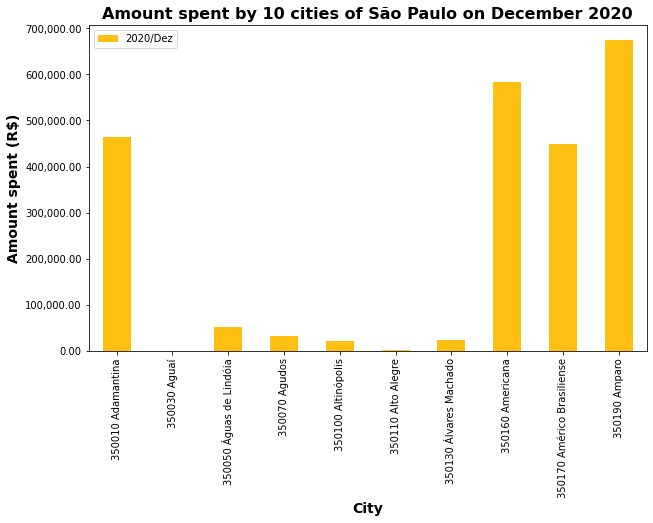

In [ ]:
ax = data.plot(x='Município',
                y='2020/Dez', 
                kind='bar', 
                figsize=(10,6),
                color='#fdbf11')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Amount spent by 10 cities of São Paulo on December 2020', fontsize=16, fontname = "Arial", fontweight='bold', color='#000000')
plt.yticks(fontname = "Arial", fontsize=10)
plt.xticks(fontname = "Arial", fontsize=10)
ax.set_xlabel('City', fontsize=14, fontname = "Arial", fontweight='bold', color='#000000')
ax.set_ylabel('Amount spent (R$)', fontsize=14, fontname = "Arial", fontweight='bold', color='#000000')
plt.show()